# Análise exploratória de exames de desempenho

Essa análise tem como objetivo verificar desempenho de pessoas desde o ensino médio(high school) até o mestrado(master's degree) levando em comparação uma série de condições para obter mais clareza em nossos dados.

Entre essas condições temos:

- Gender -> gênero da pessoa.
- Race/Ethnicity -> raça ou etnia da pessoa.
- Parental level of education -> nível de escolaridade.
- Lunch -> tipo de benefício de refeição.
- Test preparation course -> conclusão ou não de teste de preparação para o curso.
- Math score -> pontuação em matemática.
- Reading score -> pontuação em leitura.
- Writing score -> pontuação em escrita.

Dito isso, vamos começar a análise.

## Importando bibliotecas e documento

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('exams.csv') #importando o documento .csv

## Informações sobre a estrutura de dados

In [3]:
df #visualização da estrutura de dados atual

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
df.isnull().sum() #contando a quantidade de valores nulos dentro das colunas do dataframe

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.info() #informações da estrutura de dados sobre tipo de dados e contagem de dados não nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.shape #tamanho da estrutura de dados (1000 linhas x 8 colunas)

(1000, 8)

In [8]:
df.describe() #visualizando as principais estatísticas

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [9]:
df=df.rename(columns={'race/ethnicity':'race_ethnicity', 'parental level of education':'education',
       'test preparation course':'test_preparation_course', 'math score':'math_score', 'reading score':'reading_score',
       'writing score':'writing_score'}) #renomeando colunas com intuito de facilitar a digitação e leitura dos mesmos

## Plotando gráficos

In [10]:
df.head()

,gender,race_ethnicity,education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


<Axes: xlabel='gender', ylabel='count'>

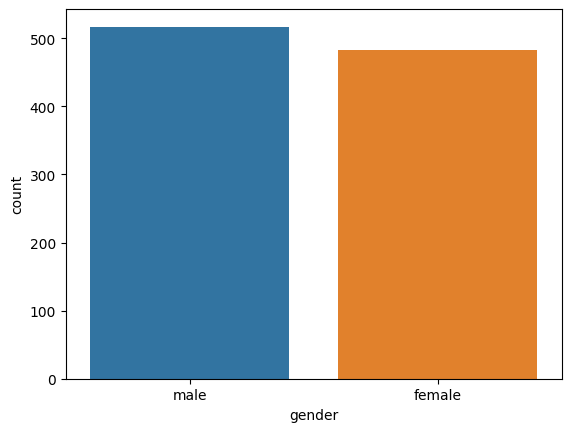

In [11]:
sns.countplot(data = df, x='gender')

In [12]:
df.gender.value_counts() #nessa estrutura contém mais pessoas do sexo masculino do que feminino.

male      517
female    483
Name: gender, dtype: int64

<Axes: xlabel='race_ethnicity', ylabel='count'>

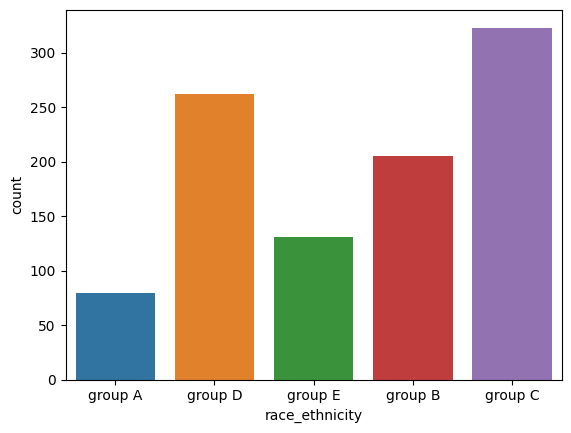

In [13]:
sns.countplot(data=df, x='race_ethnicity' )

In [14]:
#o grupo C de raça/etnia é o que tem o maior número de participantes.

In [15]:
df.race_ethnicity.value_counts()

group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64

<Axes: xlabel='race_ethnicity', ylabel='count'>

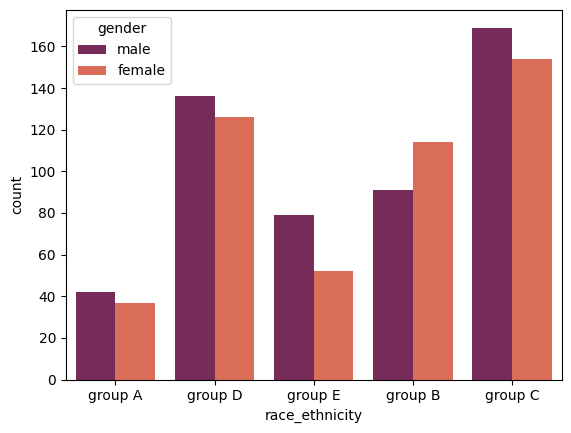

In [16]:
sns.countplot(x=df["race_ethnicity"], hue=df["gender"], palette="rocket")

In [17]:
#o grupo B é o único onde tem mais pessoas do sexo feminino do que masculino

In [18]:
df.groupby(['race_ethnicity', 'gender']).size() 

race_ethnicity  gender
group A         female     37
                male       42
group B         female    114
                male       91
group C         female    154
                male      169
group D         female    126
                male      136
group E         female     52
                male       79
dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

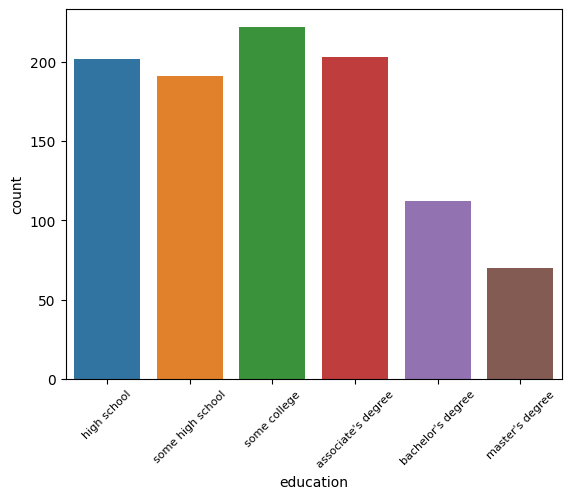

In [19]:
sns.countplot(data = df, x='education')
plt.xticks(rotation=45, fontsize=8)

In [20]:
#a maior parte dos participantes frequentaram a faculdade mas não concluiu

In [21]:
df.education.value_counts() 

some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: education, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

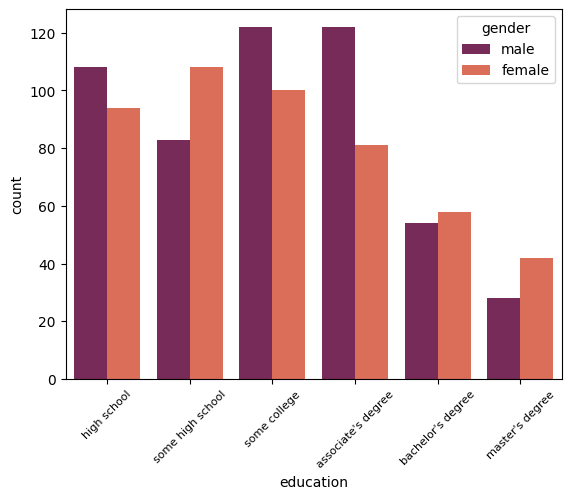

In [22]:
sns.countplot(x=df["education"], hue=df["gender"], palette="rocket")
plt.xticks(rotation=45, fontsize=8)

In [23]:
#existe um grande número de pessoas do sexo masculino que concluiu não concluiu a faculdade.
#é maior o número de pessoas do sexo masculino com ensino médio completo e faculdade técnica completa.

#a maioria de pessoas que não concluiu o ensino médio são do sexo feminino.
#o maior número de bacharelado e mestres são do sexo feminino.

In [24]:
df.groupby(['education', 'gender']).size() 

education           gender
associate's degree  female     81
                    male      122
bachelor's degree   female     58
                    male       54
high school         female     94
                    male      108
master's degree     female     42
                    male       28
some college        female    100
                    male      122
some high school    female    108
                    male       83
dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

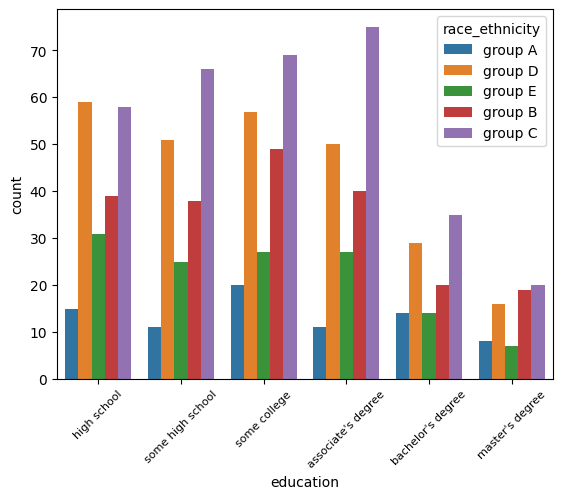

In [25]:
sns.countplot(x=df["education"], hue=df["race_ethnicity"], palette="tab10")
plt.xticks(rotation=45, fontsize=8)

In [26]:
#o grupo C é dominante em todos os níveis de escolaridade.

<Axes: xlabel='lunch', ylabel='count'>

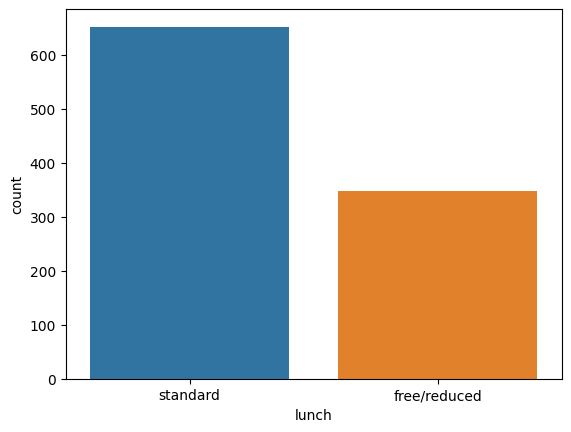

In [27]:
sns.countplot(x='lunch' ,data=df)

In [ ]:
#maior parte das pessoas tem a refeição no valor padrão.

In [28]:
df.lunch.value_counts()

standard        652
free/reduced    348
Name: lunch, dtype: int64

<Axes: xlabel='race_ethnicity', ylabel='count'>

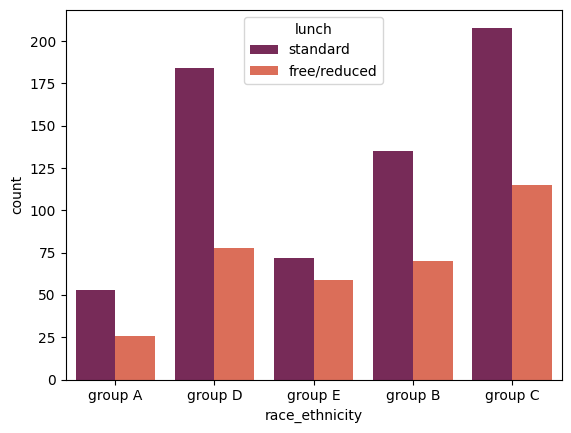

In [29]:
sns.countplot(x=df["race_ethnicity"], hue=df["lunch"], palette="rocket")

In [ ]:
#em ambos os grupos de raça/etnia, a maioria tem a refeição no valor padrão.

In [30]:
df.groupby(['race_ethnicity', 'lunch']).size()

race_ethnicity  lunch       
group A         free/reduced     26
                standard         53
group B         free/reduced     70
                standard        135
group C         free/reduced    115
                standard        208
group D         free/reduced     78
                standard        184
group E         free/reduced     59
                standard         72
dtype: int64

<Axes: xlabel='test_preparation_course', ylabel='count'>

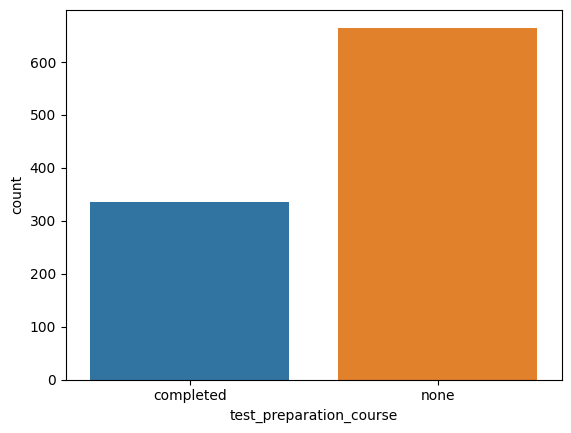

In [31]:
sns.countplot(x='test_preparation_course' ,data=df)

In [ ]:
#a maioria das pessoas não fizem o teste de preparação para o curso.

In [32]:
df.test_preparation_course.value_counts()

none         665
completed    335
Name: test_preparation_course, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

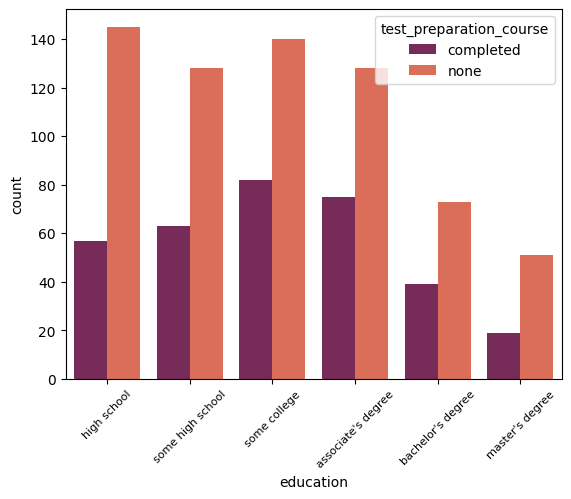

In [33]:
sns.countplot(x=df["education"], hue=df["test_preparation_course"], palette="rocket")
plt.xticks(rotation=45, fontsize=8)

In [ ]:
#em ambos os níveis de escolaridade, a maioria não fizeram o teste de preparação de curso.

In [34]:
df.groupby(['education', 'test_preparation_course']).size()

education           test_preparation_course
associate's degree  completed                   75
                    none                       128
bachelor's degree   completed                   39
                    none                        73
high school         completed                   57
                    none                       145
master's degree     completed                   19
                    none                        51
some college        completed                   82
                    none                       140
some high school    completed                   63
                    none                       128
dtype: int64

## Médias por níveis de educação

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

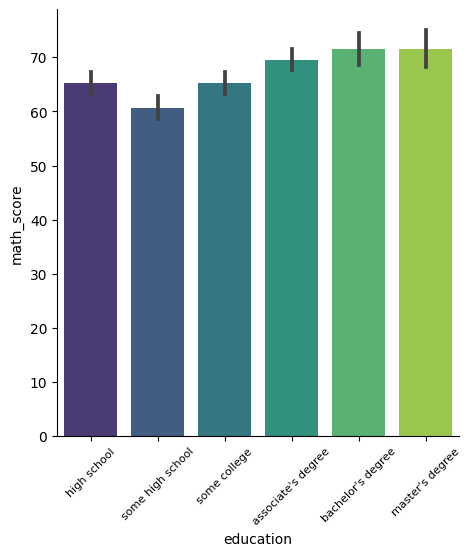

In [54]:
sns.catplot(data=df,x="education",y="math_score",kind="bar",palette="viridis")
plt.xticks(rotation=45, fontsize=8)

In [ ]:
#no exame de matemática, quem tem o pior desempenho são as pessoas que tem o ensino médio incompleto.
#em seguida, os níveis acima do ensino médio incompleto apresenta uma crescente.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

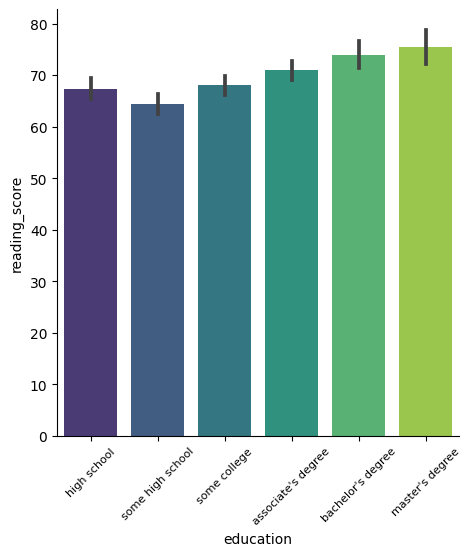

In [62]:
sns.catplot(data=df,x="education",y="reading_score",kind="bar",palette="viridis")
plt.xticks(rotation=45, fontsize=8)

In [ ]:
#o exame de leitura apresenta valores semelhantes ao de matemática, onde o pior desempenho é do ensino médio incompleto e os demais em crescente.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

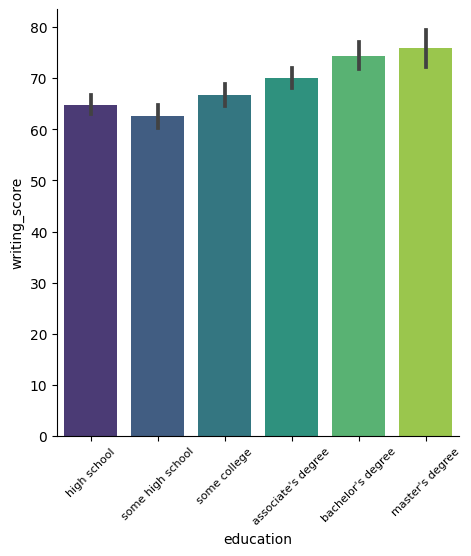

In [63]:
sns.catplot(data=df,x="education",y="writing_score",kind="bar",palette="viridis")
plt.xticks(rotation=45, fontsize=8)

In [ ]:
#no exame de escrita, a estatística se repete da mesma forma ads demais.

## Médias por raça/etnia

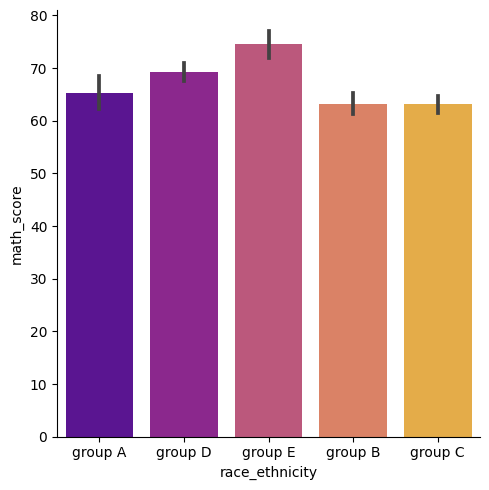

In [65]:
sns.catplot(data=df,x="race_ethnicity",y="math_score",kind="bar",palette="plasma")

In [ ]:
#o grupo E apresenta a melhor média em relação aos exames de matemática.
#os grupos B e C tem as menores médias em relação aos demais.

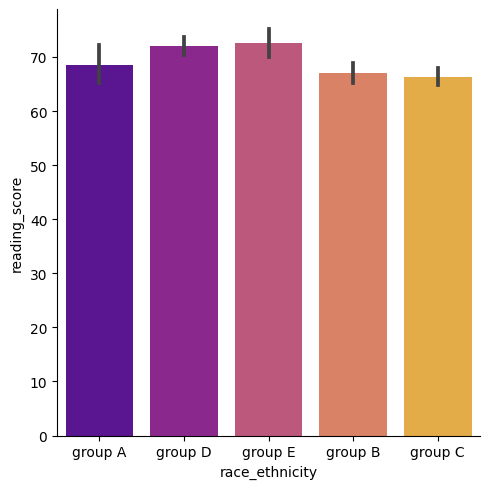

In [66]:
sns.catplot(data=df,x="race_ethnicity",y="reading_score",kind="bar",palette="plasma")

In [ ]:
#no exame de leitura, o grupo E também tem o melhor desempenho, porém, está acompanhado com o grupo D com uma média bem próxima.
#os grupos B e C tem as menores médias novamente com uma ligeira média melhor do grupo B.

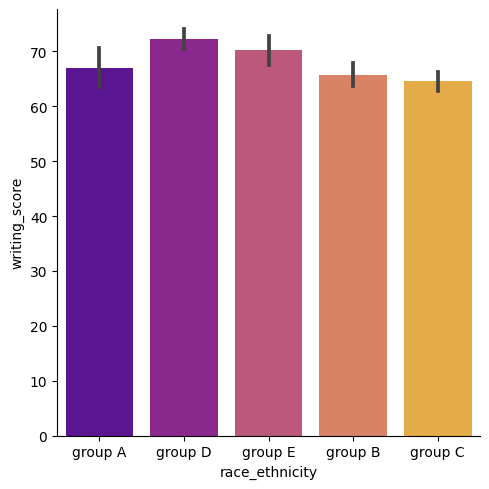

In [67]:
sns.catplot(data=df,x="race_ethnicity",y="writing_score",kind="bar",palette="plasma")

In [ ]:
#no exame de escrita, agora o grupo D tem a melhor média.
##os grupos B e C tem as menores médias novamente com uma ligeira média melhor do grupo B.

## Médias por gênero

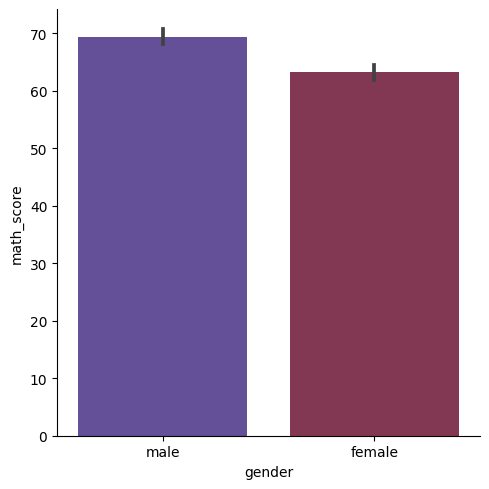

In [68]:
sns.catplot(data=df,x="gender",y="math_score",kind="bar",palette="twilight")

In [ ]:
#pessoas do sexo masculino tem melhor desempenho em exames de matemática

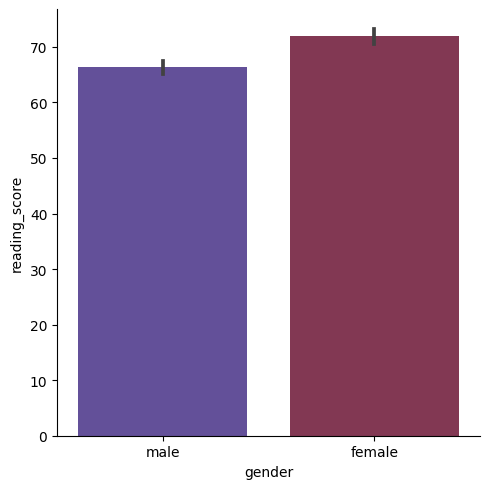

In [69]:
sns.catplot(data=df,x="gender",y="reading_score",kind="bar",palette="twilight")

In [ ]:
#pessoas do sexo feminino tem melhor desempenho em exames de leitura

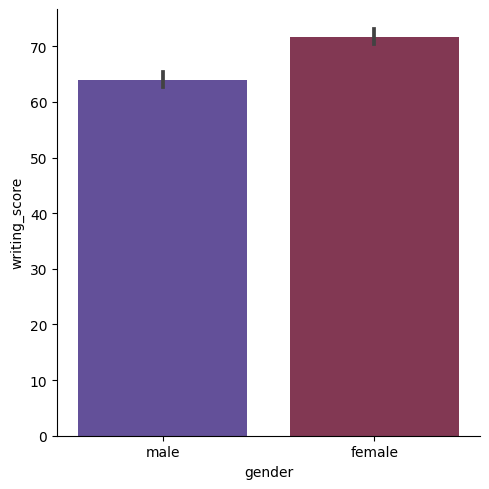

In [70]:
sns.catplot(data=df,x="gender",y="writing_score",kind="bar",palette="twilight")

In [ ]:
#pessoas do sexo feminino também tem melhor desempenho em teste de escrita

## Médias em relação ao teste de preparação de curso

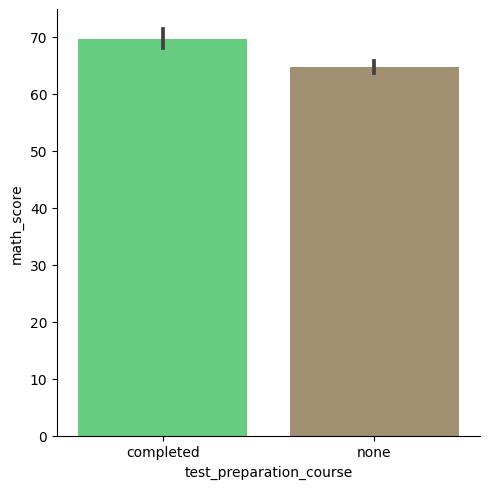

In [72]:
sns.catplot(data=df,x="test_preparation_course",y="math_score",kind="bar",palette="terrain")

In [ ]:
#quem completou o teste teve médias maiores nos exames de matemática

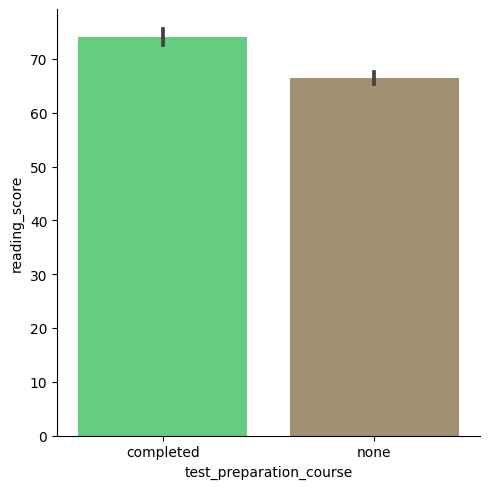

In [73]:
sns.catplot(data=df,x="test_preparation_course",y="reading_score",kind="bar",palette="terrain")

In [ ]:
#quem completou o teste também teve médias maiores nos exames de leitura

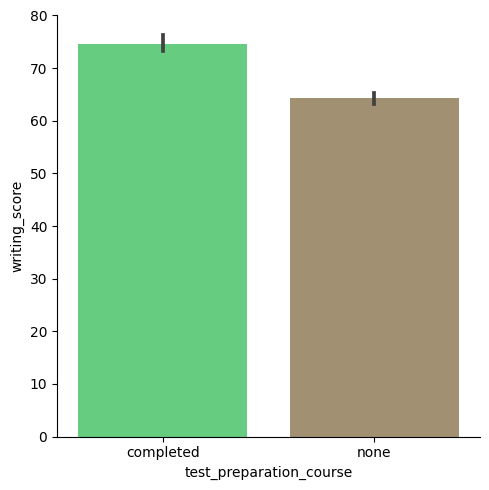

In [74]:
sns.catplot(data=df,x="test_preparation_course",y="writing_score",kind="bar",palette="terrain")

In [ ]:
#o mesmo se repete em relação aos outros dois testes onde quem completou o teste teve média melhor 

## Visualização de gráficos com média total

In [47]:
df['avg_score'] = (df['writing_score']+df['reading_score']+df['math_score']) /3

In [48]:
df.head()

,gender,race_ethnicity,education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000


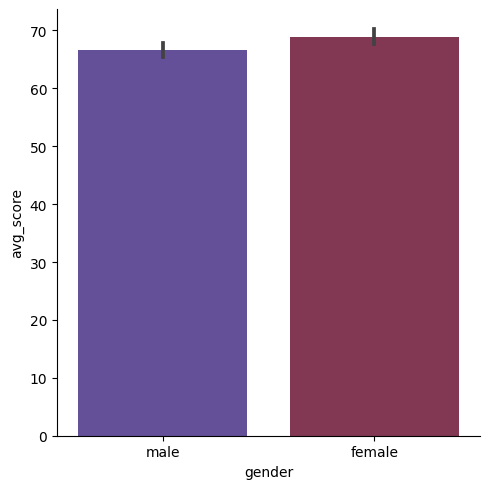

In [78]:
sns.catplot(data=df,x="gender",y="avg_score",kind="bar",palette="twilight")

In [ ]:
#pessoas do sexo feminino tiveram médias gerais melhores que pessoas do sexo masculino

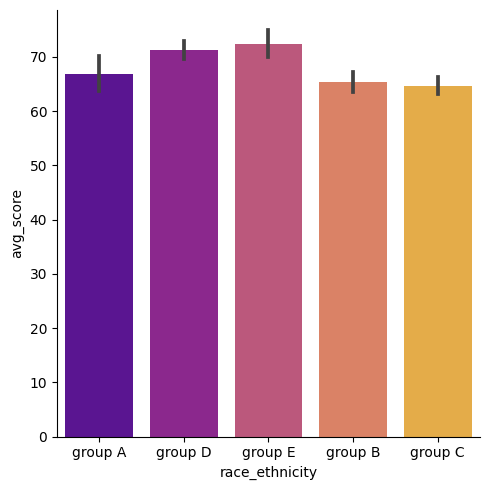

In [77]:
sns.catplot(data=df,x="race_ethnicity",y="avg_score",kind="bar",palette="plasma")

In [ ]:
#o grupo E foi quem teve melhor desempenho em médias no geral

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'high school'),
  Text(1, 0, 'some high school'),
  Text(2, 0, 'some college'),
  Text(3, 0, "associate's degree"),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

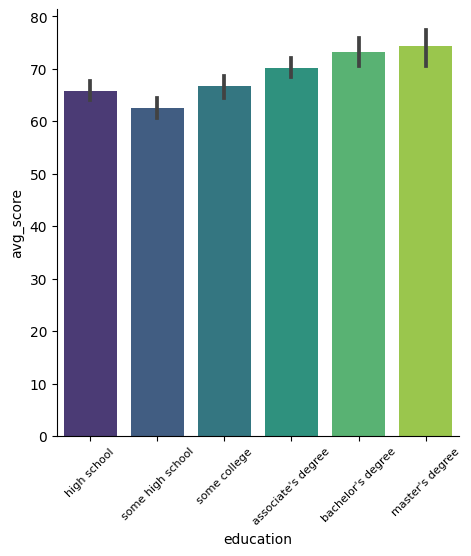

In [76]:
sns.catplot(data=df,x="education",y="avg_score",kind="bar",palette="viridis")
plt.xticks(rotation=45, fontsize=8)

In [ ]:
#quem não completou o ensino médio tem média geral mais baixa do queos demais
#mestres tem a melhor média geral

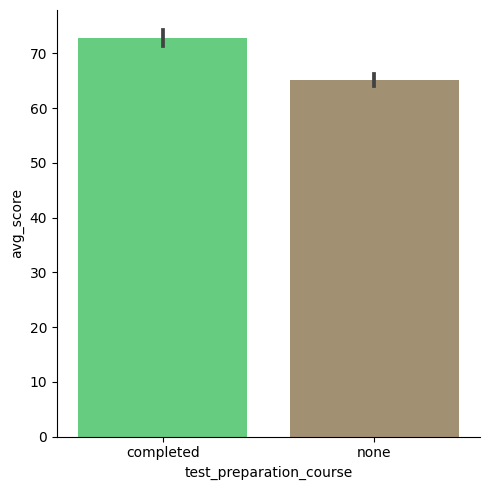

In [75]:
sns.catplot(data=df,x="test_preparation_course",y="avg_score",kind="bar",palette="terrain")

In [ ]:
#quem completou o teste de preparação de curso obteve médias melhores do que não fizeram